![title](https://image.ibb.co/erDntK/logo2018.png)

---

# Final Task - Multiclass Classification




Write down your Name and Student ID

In [ ]:
## --- start your code here ----

Student ID  = 1301163617
Name = "Simiao Salvador da Gama"
Program = "Bachelor of Informatics Engineering"


# Import Libraries


## Install TensorFlow 2


In [ ]:
!pip install tensorflow-gpu -q

     |████████████████████████████████| 320.4MB 47kB/s 


In [ ]:
import tensorflow as tf
tf.__version__

'2.3.1'


## Import other libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

np.set_printoptions(precision=7)
%matplotlib inline

import tensorflow_datasets as tfds

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from collections import Counter
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image

from PIL import Image

## Create Directory for Dataset

In [ ]:
import os

data_dir = 'dataset'
os.mkdir(data_dir)

---
# TFDS Datasets


In [ ]:
dataset_names = tfds.list_builders()

for name in dataset_names:
    print(name)

abstract_reasoning
aeslc
aflw2k3d
amazon_us_reviews
arc
bair_robot_pushing_small
beans
big_patent
bigearthnet
billsum
binarized_mnist
binary_alpha_digits
c4
caltech101
caltech_birds2010
caltech_birds2011
cars196
cassava
cats_vs_dogs
celeb_a
celeb_a_hq
cfq
chexpert
cifar10
cifar100
cifar10_1
cifar10_corrupted
citrus_leaves
cityscapes
civil_comments
clevr
cmaterdb
cnn_dailymail
coco
coil100
colorectal_histology
colorectal_histology_large
cos_e
curated_breast_imaging_ddsm
cycle_gan
deep_weeds
definite_pronoun_resolution
diabetic_retinopathy_detection
div2k
dmlab
downsampled_imagenet
dsprites
dtd
duke_ultrasound
dummy_dataset_shared_generator
dummy_mnist
emnist
eraser_multi_rc
esnli
eurosat
fashion_mnist
flic
flores
food101
gap
gigaword
glue
groove
higgs
horses_or_humans
i_naturalist2017
image_label_folder
imagenet2012
imagenet2012_corrupted
imagenet_resized
imagenette
imagewang
imdb_reviews
iris
kitti
kmnist
lfw
librispeech
librispeech_lm
libritts
lm1b
lost_and_found
lsun
malaria
math_dat

## Choose Dataset Cifar10

In [ ]:
dataset_name = "cifar10"



## Download Dataset


In [ ]:
(train_set, test_set), dataset_info =  tfds.load( 
              name=dataset_name, 
              split=["train", "test"], 
              with_info=True, 
              data_dir=data_dir
          )

## Dataset Information

In [ ]:
print(dataset_info)

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.0,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)



### Detailed Information

In [ ]:
class_names =  dataset_info.features["label"].names

print('image shape    :', dataset_info.features['image'].shape)
print('image dtype    :', dataset_info.features['image'].dtype)
print()
print('num class      : ',dataset_info.features["label"].num_classes)
print('class label    :', dataset_info.features["label"].names)
print()
print('num train data :', dataset_info.splits["train"].num_examples)
print('num test data  :', dataset_info.splits["test"].num_examples)

image shape    : (32, 32, 3)
image dtype    : <dtype: 'uint8'>

num class      :  10
class label    : ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

num train data : 50000
num test data  : 10000


## Show Images

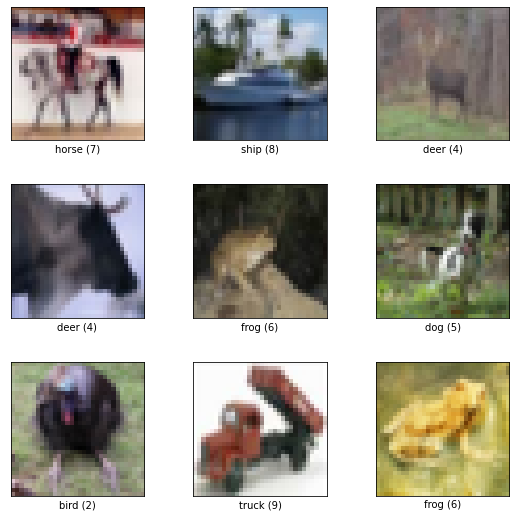

In [ ]:
fig = tfds.show_examples(dataset_info, train_set)

# Preprocess Image

Convert and Resize Dataset to Numpy

In [ ]:
input_shape = (150, 150, 3)

### Convert Data Train

In [ ]:
X_train = []
y_train = []

for example in tfds.as_numpy(train_set):
    new_img = example['image']
    new_img = cv.resize(new_img, input_shape[:2],interpolation = cv.INTER_AREA) 
    X_train.append(new_img)
    y_train.append(example['label'])

del train_set

In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

X_train.shape = (50000, 150, 150, 3)
y_train.shape = (50000,)


### Convert Data Test

In [ ]:
X_test = []
y_test = []

for example in tfds.as_numpy(test_set):
    new_img = example['image']
    new_img = cv.resize(new_img, input_shape[:2],interpolation = cv.INTER_AREA) 
    X_test.append(new_img)
    y_test.append(example['label'])

del test_set

In [ ]:
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

print('X_test.shape =',X_test.shape)
print('y_test.shape =',y_test.shape)

X_test.shape = (10000, 150, 150, 3)
y_test.shape = (10000,)


## Split Data Train into Train and Val

In [ ]:
X_val   = X_train[-300:]
y_val   = y_train[-300:]

X_train = X_train[:-300]
y_train = y_train[:-300]

In [ ]:
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

print('\nX_val.shape  =',X_val.shape)
print('y_val.shape  =',y_val.shape)

print('\nX_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (49400, 150, 150, 3)
y_train.shape = (49400,)

X_val.shape  = (300, 150, 150, 3)
y_val.shape  = (300,)

X_test.shape  = (10000, 150, 150, 3)
y_test.shape  = (10000,)


# One hot y labels

In [ ]:
y_train_hot = to_categorical(y_train, 102)
y_val_hot   = to_categorical(y_val, 102)
y_test_hot  = to_categorical(y_test, 102)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (49400, 102)
y_val_hot.shape   = (300, 102)
y_test_hot.shape  = (10000, 102)


---
# Classification Model

## Create Model

For Example in this program Using inception-resnet-v2

In [ ]:
model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [ ]:
x = model.layers[-1].output
x = GlobalAveragePooling2D() (x)
predictions = Dense(102, activation='softmax') (x)

myModel = Model(inputs=model.input, outputs=predictions)

## Visualize Model

In [ ]:
myModel.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_609 (Conv2D)             (None, 74, 74, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_609 (BatchN (None, 74, 74, 32)   96          conv2d_609[0][0]                 
__________________________________________________________________________________________________
activation_609 (Activation)     (None, 74, 74, 32)   0           batch_normalization_609[0][0]    
_______________________________________________________________________________________

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.281777 to fit



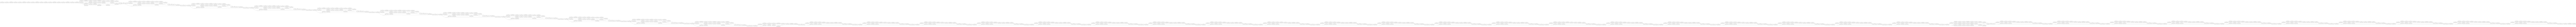

In [ ]:
plot_model(model, show_shapes=True,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=60
)

## Compile Model



In [ ]:
myModel.compile(
      loss='categorical_crossentropy',
      optimizer=tf.keras.optimizers.Adam(), 
      metrics=['accuracy']
  )

---
# [Optional] Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    channel_shift_range=0.1,
    horizontal_flip=True
)

# [Optional] Callbacks
* Checkpoint
* Learning Rate Annealing
* etc, have fun

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

def lr_schedule(epoch):
    lr = 1e-3
    if (epoch > 30):
        lr *= 0.01
    elif (epoch > 20):
        lr *= 0.1
    return lr

lr_callback = LearningRateScheduler(lr_schedule)

myCheckpoint = ModelCheckpoint(filepath='./dataset/my_model.h5', 
                               monitor='val_accuracy',
                               save_best_only=True,
                              )

# Train the Model

In [ ]:
history_all = []

In [ ]:
batch_size = 64
epochs = 40

In [ ]:
augmented_train = datagen.flow(
    X_train, y_train_hot, batch_size
)

history = myModel.fit_generator(
    augmented_train,
    validation_data=(X_val, y_val_hot),
    epochs=epochs, 
    steps_per_epoch=len(X_train)/64,
    callbacks=[lr_callback, myCheckpoint],
    verbose=2)

history_all.append(history)

Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/40
772/771 - 233s - loss: 0.5358 - accuracy: 0.8218 - val_loss: 0.7195 - val_accuracy: 0.8067
Epoch 2/40
772/771 - 229s - loss: 0.3313 - accuracy: 0.8878 - val_loss: 0.3791 - val_accuracy: 0.8833
Epoch 3/40
772/771 - 228s - loss: 0.2775 - accuracy: 0.9045 - val_loss: 0.3344 - val_accuracy: 0.9000
Epoch 4/40
772/771 - 226s - loss: 0.2335 - accuracy: 0.9194 - val_loss: 0.4798 - val_accuracy: 0.8467
Epoch 5/40
772/771 - 226s - loss: 0.2012 - accuracy: 0.9309 - val_loss: 0.2993 - val_accuracy: 0.8967
Epoch 6/40
772/771 - 225s - loss: 0.1841 - accuracy: 0.9366 - val_loss: 0.3326 - val_accuracy: 0.8933
Epoch 7/40
772/771 - 229s - loss: 0.1699 - accuracy: 0.9405 - val_loss: 0.2217 - val_accuracy: 0.9267
Epoch 8/40
772/771 - 226s - loss: 0.1550 - accuracy: 0.9467 - val_loss: 0.2227 - val_accuracy: 0.9133
Epoch 9/40
772/771 - 225s - loss: 0.1382 - accuracy: 0.9524 - val_loss: 0.3059 - val_accuracy: 0.9133
Epoch 10/40
772/771 - 226s - loss: 0.1255 - accuracy: 0.9559 - val_loss: 0.7503 - 

## Plot Current History Training

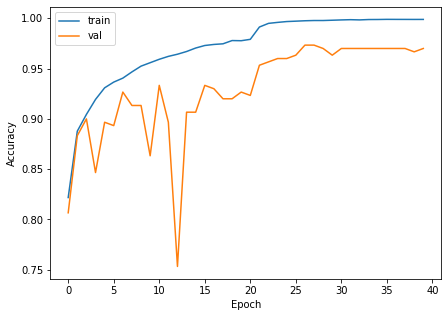

In [ ]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## Plot All History Training

In [ ]:
hist_train = []
hist_val = []

for h in history_all:
    hist_train.append(h.history['accuracy'][1:])
    hist_val.append(h.history['val_accuracy'][1:])

In [ ]:
hist_train = np.array(hist_train).reshape(-1)
hist_val = np.array(hist_val).reshape(-1)

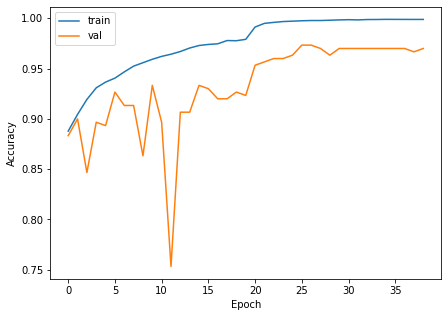

In [ ]:
plt.rcParams['figure.figsize'] = [7, 5]

plt.plot(hist_train, label='train')
plt.plot(hist_val, label='val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



# Evaluate Model


In [ ]:
myModel.load_weights('./dataset/my_model.h5')
scores = myModel.evaluate(X_test, y_test_hot)

313/313 [==============================] - 20s 65ms/step - loss: 0.2039 - accuracy: 0.9583


In [ ]:
print('Test loss    :', scores[0])
print('Test accuracy: %.2f%%' % (scores[1]*100))

Test loss    : 0.2038804143667221
Test accuracy: 95.83%


---
# Save Model

Save model into .h5 file


In [ ]:
myModel.load_weights('./dataset/my_model.h5')


<font color = 'red' size = 5> 
* Download your model from the Files tab 
* Upload your model to a cloud storage
*</font>

# Redownload The Model


In [ ]:
!wget -O 'gdrive_downloader.py' 'https://github.com/CNN-ADF/Task2019/raw/master/resources/gdrive_downloader.py' -q

In [ ]:
from gdrive_downloader import *

links = 'https://drive.google.com/uc?id=1EGRgc5_gl8yka4Y0jzOPO2y3g-ARabvz'

filename = './reloaded_model.h5'

model = model_downloader(links, filename)

model saved as ./reloaded_model.h5


# Re-Evaluate Model


In [ ]:
train_scores = myModel.evaluate(X_train, y_train_hot)
test_scores  = myModel.evaluate(X_test, y_test_hot)
val_scores   = myModel.evaluate(X_val, y_val_hot)

10/10 [==============================] - 1s 56ms/step - loss: 0.1271 - accuracy: 0.9733


In [ ]:
print('Train Loss: %.5f with Accuracy: %.1f%%' % (train_scores[0], (train_scores[1]*100)))
print('Test  Loss: %.5f with Accuracy: %.1f%%' % (test_scores[0], (test_scores[1]*100)))
print('Val   Loss: %.5f with Accuracy: %.1f%%' % (val_scores[0], (val_scores[1]*100)))

Train Loss: 0.00071 with Accuracy: 100.0%
Test  Loss: 0.20388 with Accuracy: 95.8%
Val   Loss: 0.12706 with Accuracy: 97.3%


---
# Test the image from the internet 


In [ ]:
!wget -O 'data_test_0.jpg' 'https://scx1.b-cdn.net/csz/news/800/2018/2-dog.jpg' 
!wget -O 'data_test_1.jpg' 'https://static.toiimg.com/thumb/msid-67586673,width-800,height-600,resizemode-75,imgsize-3918697,pt-32,y_pad-40/67586673.jpg'
!wget -O 'data_test_2.jpg' 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/Green_tree_frog.jpg/799px-Green_tree_frog.jpg'
!wget -O 'data_test_3.jpg' 'https://bsmedia.business-standard.com/_media/bs/img/article/2019-10/15/full/1571086349-8577.jpg'
!wget -O 'data_test_4.jpg' 'https://www.om.org/img/h55955_42-62.jpg'

--2020-10-01 07:56:10--  https://scx1.b-cdn.net/csz/news/800/2018/2-dog.jpg
Resolving scx1.b-cdn.net (scx1.b-cdn.net)... 84.17.37.209
Connecting to scx1.b-cdn.net (scx1.b-cdn.net)|84.17.37.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘data_test_0.jpg’

data_test_0.jpg         [ <=>                ]  29.54K  --.-KB/s    in 0.06s   

2020-10-01 07:56:10 (502 KB/s) - ‘data_test_0.jpg’ saved [30250]

--2020-10-01 07:56:10--  https://static.toiimg.com/thumb/msid-67586673,width-800,height-600,resizemode-75,imgsize-3918697,pt-32,y_pad-40/67586673.jpg
Resolving static.toiimg.com (static.toiimg.com)... 104.94.57.5, 2600:1417:76:297::216f, 2600:1417:76:28d::216f
Connecting to static.toiimg.com (static.toiimg.com)|104.94.57.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41784 (41K) [image/jpeg]
Saving to: ‘data_test_1.jpg’

data_test_1.jpg     100%[===================>]  40.80K  --.-KB/s    in 0.003s

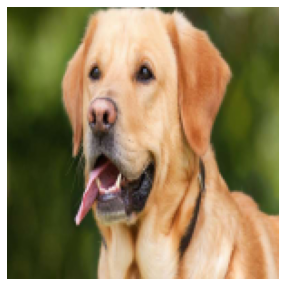

predicted id 5
class prediction dog


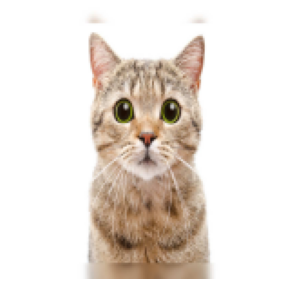

predicted id 3
class prediction cat


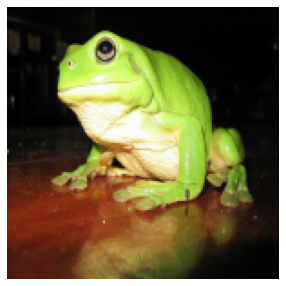

predicted id 6
class prediction frog


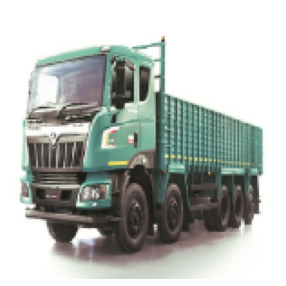

predicted id 9
class prediction truck


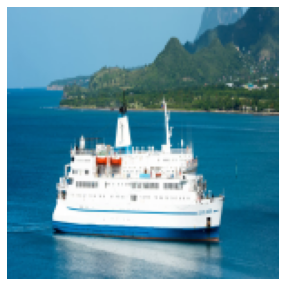

predicted id 8
class prediction ship


In [ ]:
for i in range(5):
  new_img = Image.open('data_test_'+str(i)+'.jpg')
  new_img = np.array(new_img)
  new_img2 = cv.resize(new_img, input_shape[:2], interpolation=cv.INTER_AREA)
  plt.imshow(new_img2)
  plt.axis('off')
  plt.show()

  new_img2 = np.expand_dims(new_img2,0).astype(np.float64)
  pred = myModel.predict(new_img2)
  class_id = np.argmax(pred)
  print('predicted id',class_id)
  print('class prediction', class_names[class_id])